In [53]:
import numpy as np
import pandas as pd
import scipy.stats

pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt, rcParams
# import cv2
import seaborn as sns

sns.set(style="white", context="paper")
from cycler import cycler
import os, sys
import glob
from datetime import datetime, timedelta
from itertools import combinations, product
import base64
from PIL import Image
from io import BytesIO as _BytesIO
import requests
import json
import pickle
from datetime import datetime
from IPython.display import display, Markdown, Latex
from sklearn.metrics import *
import collections
from copy import deepcopy
import traceback
from sympy import Point, Polygon
from decorators import *
from smartprint import smartprint as sprint
from scipy.spatial.distance import cdist
import cv2
from sklearn.cluster import DBSCAN
# import plotly
# from pandas_profiling import ProfileReport

pd.options.display.max_columns = None
def printm(s): return display(Markdown(s))
    
SERVER_CACHE_DIR = '/mnt/ci-nas-cache/edulyzeV2/cache_compute_4/fixed_face'
os.makedirs(SERVER_CACHE_DIR,exist_ok=True)

track_analysis_meta_cache = f'{SERVER_CACHE_DIR}/analysis_tracking/meta_info'
base_dir = '/mnt/ci-nas-cache/edulyzeV2/pose_face_gaze_emb_fixed_face/'

track_analysis_session_data = f'{SERVER_CACHE_DIR}/analysis_tracking/session_tracking_info'
os.makedirs(track_analysis_session_data,exist_ok=True)

postprocessed_id_map_data_dir = f'{SERVER_CACHE_DIR}/analysis_tracking/processed_id_maps'
os.makedirs(postprocessed_id_map_data_dir, exist_ok=True)

emb_analysis_session_data = f'{SERVER_CACHE_DIR}/analysis_emb/session_emb_info_new'
os.makedirs(emb_analysis_session_data,exist_ok=True)

pose_analysis_session_data = f'{SERVER_CACHE_DIR}/analysis_pose/session_pose_info'
os.makedirs(pose_analysis_session_data,exist_ok=True)

embmatched_id_raw_data_dir = f'{SERVER_CACHE_DIR}/analysis_emb/embmatched_id_raw'
os.makedirs(embmatched_id_raw_data_dir,exist_ok=True)

embmatched_id_map_data_dir = f'{SERVER_CACHE_DIR}/analysis_tracking/embmatched_id_maps_new'
os.makedirs(embmatched_id_map_data_dir, exist_ok=True)

in_session_median_embeddings_data_dir = f'{SERVER_CACHE_DIR}/analysis_tracking/in_session_median_embeddings'
os.makedirs(in_session_median_embeddings_data_dir, exist_ok=True)

in_session_cluster_embeddings_data_dir = f'{SERVER_CACHE_DIR}/analysis_tracking/in_session_cluster_embeddings'
os.makedirs(in_session_cluster_embeddings_data_dir, exist_ok=True)

id_viz_cache_root = f'{SERVER_CACHE_DIR}/analysis_tracking/session_matching_info'
os.makedirs(id_viz_cache_root, exist_ok=True)

In [2]:
session_filter_list = [
 #    'classinsight-cmu_05681A_ghc_4301_201905011630',
 # 'classinsight-cmu_05681A_ghc_4301_201904171630',
 # 'classinsight-cmu_05681A_ghc_4301_201902201630',
 # 'classinsight-cmu_05681A_ghc_4301_201904101630',
 # 'classinsight-cmu_05681A_ghc_4301_201901231630',
 # 'classinsight-cmu_05418A_ghc_4102_201902251200',
 # 'classinsight-cmu_05418A_ghc_4102_201904081200',
 # 'classinsight-cmu_05418A_ghc_4102_201905011200',
 # 'classinsight-cmu_05418A_ghc_4102_201904291200',
 # 'classinsight-cmu_05418A_ghc_4102_201904011200',
 'classinsight-cmu_05748A_ghc_4101_201902141630',
 'classinsight-cmu_05748A_ghc_4101_201904021630',
 'classinsight-cmu_05748A_ghc_4101_201902051630',
 'classinsight-cmu_05748A_ghc_4101_201902281630',
 'classinsight-cmu_05748A_ghc_4101_201903071630',
 # 'classinsight-cmu_21127J_ghc_4102_201904230930',
 # 'classinsight-cmu_21127J_ghc_4102_201903260930',
 # 'classinsight-cmu_21127J_ghc_4102_201904160930',
 # 'classinsight-cmu_21127J_ghc_4102_201904300930',
 # 'classinsight-cmu_21127J_ghc_4102_201903190930',
 # 'classinsight-cmu_05410A_ghc_4301_201904151500',
 # 'classinsight-cmu_05410A_ghc_4301_201902251500',
 # 'classinsight-cmu_05410A_ghc_4301_201904081500',
 # 'classinsight-cmu_05410A_ghc_4301_201904221500',
 # 'classinsight-cmu_05410A_ghc_4301_201902181500',
                       
 'classinsight-cmu_17214B_ph_a21_201902271030',
 'classinsight-cmu_17214B_ph_a21_201903061030',
 'classinsight-cmu_17214B_ph_a21_201904031030',
 'classinsight-cmu_17214B_ph_a21_201904101030',
 'classinsight-cmu_17214B_ph_a21_201904241030',
 'classinsight-cmu_17214C_ph_225b_201903201130',
 'classinsight-cmu_17214C_ph_225b_201904101130',
 'classinsight-cmu_17214C_ph_225b_201904171130',
 'classinsight-cmu_17214C_ph_225b_201904241130',
 'classinsight-cmu_17214C_ph_225b_201905011130',
 # 'classinsight-cmu_05410B_ghc_4211_201902111500',
 # 'classinsight-cmu_05410B_ghc_4211_201903181500',
 # 'classinsight-cmu_05410B_ghc_4211_201904081500',
 # 'classinsight-cmu_05410B_ghc_4211_201904151500',
 # 'classinsight-cmu_05410B_ghc_4211_201904221500',
 # 'classinsight-cmu_05410B_ghc_4211_201901281500'
]

## Get embedding and gaze information for all frames for all sessions (Run if needed, commented out for now)?

## Get frame file data for all sessions

In [3]:

frame_file_data = {}
for course_idx, course_dir in enumerate(glob.glob(f"{base_dir}/*")):
    course_name = course_dir.split("/")[-1]
    course_cache_file = f"{track_analysis_meta_cache}/{course_name}"
    if os.path.exists(course_cache_file):
        frame_file_data[course_name] = pickle.load(open(course_cache_file,"rb"))
        continue
    frame_file_data[course_name]={}
        
    for session_idx, session_dir in enumerate(glob.glob(f"{course_dir}/*")):
        session_name = session_dir.split("/")[-1]
        frame_file_data[course_name][session_name] = {}
        frame_files = glob.glob(f"{session_dir}/*")
        frame_file_names = [xr.split("/")[-1] for xr in frame_files]
        if 'end.pb' in frame_file_names:
            frame_file_data[course_name][session_name]['is_completed']=True
        else:
            frame_file_data[course_name][session_name]['is_completed']=False            
        frame_ids = [int(xr.split(".")[0]) for xr in frame_file_names if not (xr=='end.pb')]
        frame_file_data[course_name][session_name]['frame_ids'] = sorted(frame_ids)
        frame_file_data[course_name][session_name]['dir_location'] = session_dir
        print(f"Got metadata for course: {course_idx}-{course_name}, session:{session_idx}-{session_name}")
    pickle.dump(frame_file_data[course_name],open(course_cache_file,"wb")) 
        
        
frame_file_data.keys()

dict_keys(['05748A', '05410B', '17214C', '17214B', '05681A', '24352A', '24352C', '86375A'])

In [4]:
dummy_kps = frame_data[0]['keypoints']

NameError: name 'frame_data' is not defined

In [38]:
# openpose_body_markers = ['nose', 'neck', 'right shoulder', 'right elbow', 'right wrist',
#         'left shoulder', 'left elbow', 'left wrist', 'right hip', 'right knee',
#         'right ankle', 'left hip', 'left knee', 'left ankle', 'right eye',
#         'left eye', 'right ear', 'left ear'
#             ]
openpose25_body_markers = ['nose', 'neck', 'right shoulder', 'right elbow', 'right wrist',
        'left shoulder', 'left elbow', 'left wrist', 'hip','right hip', 'right knee',
        'right ankle', 'left hip', 'left knee', 'left ankle', 'right eye',
        'left eye', 'right ear', 'left ear']

posenet_body_markers =[
        'nose', 'left eye', 'right eye', 'left ear', 'right ear',
        'left shoulder', 'right shoulder', 'left elbow', 'right elbow',
        'left wrist', 'right wrist', 'left hip', 'right hip', 'left knee',
        'right knee', 'left ankle', 'right ankle'
    ]

def posenet_to_openpose(keypoints):
    openpose_keypoints = np.zeros((26,3))
    for i in range(keypoints.shape[0]):
        openpose_index = openpose25_body_markers.index(posenet_body_markers[i])
        # print(posenet_body_markers[i], openpose_index)
        openpose_keypoints[openpose_index]= keypoints[i]
    openpose_keypoints[1] = (openpose_keypoints[2] + openpose_keypoints[5])/2
    openpose_keypoints[8] = (openpose_keypoints[9] + openpose_keypoints[12])/2
    return openpose_keypoints.flatten()


In [28]:

keypoints = posenet_to_openpose(dummy_kps)
keypoints, keypoints.flatten()

NameError: name 'dummy_kps' is not defined

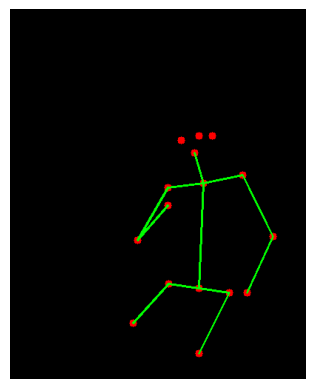

In [36]:
#verification for point conversion
# import cv2
# keypoints = [
#     (100, 200),  # Nose
#     (120, 180),  # Neck
#     (80, 170),   # Right Shoulder
#     (150, 170),  # Left Shoulder
#     (90, 250),   # Right Elbow
#     (160, 240),  # Left Elbow
#     (100, 320),  # Right Wrist
#     (170, 310),  # Left Wrist
#     # Add more keypoints as needed
# ]

# Define the skeleton connections (pairs of keypoints)
skeleton = [
    # Upper body
    (0, 1),   # Nose to Neck
    (1, 2),   # Neck to Right Shoulder
    (1, 5),   # Neck to Left Shoulder
    (2, 3),   # Right Shoulder to Right Elbow
    (3, 4),   # Right Elbow to Right Wrist
    (5, 6),   # Left Shoulder to Left Elbow
    (6, 7),   # Left Elbow to Left Wrist

    # Lower body
    (1, 8),   # Neck to Right Hip
    (1, 11),  # Neck to Left Hip
    (8, 9),   # Right Hip to Right Knee
    (9, 10),  # Right Knee to Right Ankle
    (11, 12), # Left Hip to Left Knee
    (12, 13), # Left Knee to Left Ankle

    # Connect upper body to lower body
    (8, 12),  # Right Hip to Left Hip

    # Additional connections for body parts
    (0, 14),  # Nose to Right Eye
    (0, 15),  # Nose to Left Eye
    (14, 16), # Right Eye to Right Ear
    (15, 17)  # Left Eye to Left Ear
]
openpose_skeleton_25 = [
    # Upper body
    (0, 1),   # Nose to Neck
    (1, 2),   # Neck to Right Shoulder
    (2, 3),   # Right Shoulder to Right Elbow
    (3, 4),   # Right Elbow to Right Wrist
    (1, 5),   # Neck to Left Shoulder
    (5, 6),   # Left Shoulder to Left Elbow
    (6, 7),   # Left Elbow to Left Wrist

    # Lower body
    (1, 8),   # Neck to Right Hip
    (8, 9),   # Right Hip to Right Knee
    (9, 10),  # Right Knee to Right Ankle
    (1, 11),  # Neck to Left Hip
    (11, 12), # Left Hip to Left Knee
    (12, 13), # Left Knee to Left Ankle

    # Connect upper body to lower body
    (8, 12),  # Right Hip to Left Hip

    # Additional connections for face and ears
    (14, 15), # Right Eye to Left Eye
    (15, 17), # Left Eye to Left Ear
    (14, 16), # Right Eye to Right Ear

    # Additional connections for optional keypoints
    (10, 19), # Right Knee to Right Big Toe
    (19, 20), # Right Big Toe to Right Small Toe
    (20, 21), # Right Small Toe to Right Heel

    (13, 22), # Left Knee to Left Big Toe
    (22, 23), # Left Big Toe to Left Small Toe
    (23, 24), # Left Small Toe to Left Heel

    # Background (used for image segmentation)
    (0, 25)  # Nose to Background
]

BODY_25_KEYPOINT_CONNECTIONS = [
    (8, 9),
    (8, 12),  
    (1, 2), 
    (2, 3),
    (3, 4),
    (1, 5),
    (5, 6),
    (6, 7),
    (1, 0),  
    (0, 15),
    (15, 17),
    (0, 16),
    (16, 18),
    (2, 12),
    (9, 5),
    (12, 14), 
    (14, 16),
    (16, 20),
    (20, 22),
    (9, 11),
    (11, 13),
    (13, 15),
    (15, 19),
    (19, 21)
]



keypoints = np.array([[1849, 194, 1], #0
                      [1861, 235, 1], #1
                      [1813, 241, 1], #2
                      [1772, 312, 1], #3
                      [1813, 265, 1], #4
                      [1914, 224, 1], #5
                      [1955, 307, 1], #6
                      [1920, 383, 1], #7
                      [1855, 377, 1], #8
                      [1814, 371, 1], #9
                      [1766, 424, 1], #10
                      [0, 0, 0], #11
                      [1896, 383, 1], #12
                      [1855, 465, 1], #13
                      [0, 0, 0], #14
                      [1831, 177, 1], #15
                      [1855, 171, 1], #16
                      [0, 0, 0], #17
                      [1873, 171, 1], #18
                      [0, 0, 0], #0
                      [0, 0, 0], 
                      [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]])
# Create an image canvas
image = np.zeros((2160,3840, 3), dtype=np.uint8)

# Draw keypoints
for idx, (x, y, p) in enumerate(keypoints):
    if (x>0):
        cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1)
        # image = cv2.putText(image, (int(x), int(y)), 5, (0, 0, 255), -1)

# Draw skeleton lines
for start, end in openpose_skeleton_25:
    x1, y1 = keypoints[start][:2]
    x1, y1 = int(x1), int(y1)
    x2, y2 = keypoints[end][:2]
    x2, y2 = int(x2), int(y2)
    if (x1>0) & (x2>0):
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with skeleton
plt.imshow(cv2.cvtColor(image[0:500,1600:2000,:], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()#0

In [39]:
from edusense_scripts.process_frame import process_frame
from edusense_scripts.centroidtracker import *


In [54]:
os.path.exists(pose_analysis_session_data)

True

In [56]:
# writing a generic loop to get edusense inference info from all courses in frame file data
logger = logging.getLogger()
for course_idx, course in enumerate(frame_file_data):
    for session_idx, session_id in enumerate(frame_file_data[course]):
        if session_id.split("-front")[0] not in session_filter_list:
            print(f"Session {session_id} not in session filter list, skipping...")
            continue
        session_pose_cache_file = f"{pose_analysis_session_data}/{session_id}.pb"
        # try:
        if not os.path.exists(session_pose_cache_file):
            st_time = time.time()
            session_dir = frame_file_data[course][session_id]['dir_location']
            frame_ids = frame_file_data[course][session_id]['frame_ids']
            session_frame_info = {}
            ctracker = CentroidTracker()
            for frame_id in frame_ids:
                frame_number, frame_data = pickle.load(open(f'{session_dir}/{frame_id}.pb','rb'))
                edusense_frame_data = {'people':[
                    {
                        'track_id':int(person_info['track_id']),
                        'bbox': person_info['bbox'] if 'bbox' in person_info else None,
                        'rvec': person_info['rvec'] if 'rvec' in person_info else None,
                        'face_bb': person_info['face'] if 'face' in person_info else None,
                        'gaze_2d':person_info['gaze_2d'] if 'gaze_2d' in person_info else None,
                        'face_embedding': person_info['face_embedding'] if 'face_embedding' in person_info else None,
                        'posenet_pose': person_info['keypoints'] if 'keypoints' in person_info else None,
                        'body': posenet_to_openpose(person_info['keypoints']) if 'keypoints' in person_info else None,
                    } for person_info in frame_data
                ]
                }
                try:
                    frame_data = process_frame(frame_id, edusense_frame_data, ctracker,logger)
                    session_frame_info[frame_id] = frame_data
                except:
                    print(f"Error in frame:{session_id}-{frame_id}")
                    session_frame_info[frame_id] = edusense_frame_data
                # session_frame_info[frame_id] = frame_data
                
            pickle.dump(session_frame_info, open(session_pose_cache_file,'wb'))
            print(f"Got pose info for session: {course_idx}-{course}, session:{session_idx}-{session_id} in {round(time.time()-st_time,2)} secs...")
        else:
            ...
            print(f"FILE EXISTS: pose info for session: {course_idx}-{course}, session:{session_idx}-{session_id}")
        # except:
        #     print(f"ERROR: Unable to get session emb for: {course_idx}-{course}, session:{session_idx}-{session_id}")
        #     unfinished_sessions.append((course, session_id))
        #     print(traceback.format_exc())
    

FILE EXISTS: pose info for session: 0-05748A, session:0-classinsight-cmu_05748A_ghc_4101_201902051630-front
FILE EXISTS: pose info for session: 0-05748A, session:1-classinsight-cmu_05748A_ghc_4101_201902141630-front
Session classinsight-cmu_05748A_ghc_4101_201901291630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201901311630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902071630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902121630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902191630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902211630-front not in session filter list, skipping...
FILE EXISTS: pose info for session: 0-05748A, session:8-classinsight-cmu_05748A_ghc_4101_201902281630-front
Session classinsight-cmu_05748A_ghc_4101_201903051630-front not in session f

In [50]:
frame_data['people'][0]['inference'], frame_data['people'][0]['face_bb'][0][:4]+frame_data['people'][0]['bbox'][:4]

({'posture': {'armPose': 'other', 'sitStand': 'sit'},
  'face': {'boundingBox': ((1481, 86), (1651, 256)), 'orientation': 'front'},
  'head': {},
  'trackingId': 1},
 array([1553.98666382,  135.38059616, 1870.01463318,  661.04780579]))

In [11]:
len([1.56673743e+03, 1.71408447e+02, 1.00000000e+00, 1.59161292e+03,
        2.14375366e+02, 1.00000000e+00, 1.53960034e+03, 2.07591125e+02,
        1.00000000e+00, 1.50341772e+03, 2.75433594e+02, 1.00000000e+00,
        1.49437207e+03, 3.16139099e+02, 1.00000000e+00, 1.64362549e+03,
        2.21159607e+02, 1.00000000e+00, 1.63457983e+03, 3.07093445e+02,
        1.00000000e+00, 1.55769177e+03, 3.20661926e+02, 1.00000000e+00,
        1.53055469e+03, 3.43276062e+02, 1.00000000e+00, 1.45366663e+03,
        4.06595764e+02, 1.00000000e+00, 1.50341772e+03, 5.15143677e+02,
        1.00000000e+00, 1.59839722e+03, 3.47798889e+02, 1.00000000e+00,
        1.59387439e+03, 4.11118591e+02, 1.00000000e+00, 1.58935156e+03,
        5.28712219e+02, 1.00000000e+00, 1.56221460e+03, 1.62362793e+02,
        1.00000000e+00, 1.58030591e+03, 1.62362793e+02, 1.00000000e+00,
        1.55316895e+03, 1.57839966e+02, 1.00000000e+00, 1.60744287e+03,
        1.57839966e+02, 1.00000000e+00])

54

In [ ]:
# get gaze info on looking down and get gaze marker for looking front.

#For looking front, yaw-angle is less than +/- 30%